# Second wave analysis

In [1]:
#hide
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
%matplotlib inline
from datetime import date
import datetime

In [2]:
#hide_input
headings= """
<!-- #######  HTML!! #########-->
<h1 style="color: #ff3933; text-align: center;">Covid-19 Matplotlib Overview in India</h1>
<h2 style="color: #3361ff; text-align: center;">Second wave Analysis (from 20th April 2021)</h2>"""
html = HTML(headings)
display(html)

In [3]:
#hide
df  = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')
df = df[['Date','State','Confirmed','Deceased']]
df = df.rename(columns={'Confirmed':'Cases', "Deceased":'Deaths'})
df_cases = df[["Date",'State','Cases']]
df_deaths = df[['Date','State','Deaths']]
df_cases1 = df_cases.groupby('Date')
df_deaths1= df_deaths.groupby('Date')


In [4]:
#hide
df_cases1.head()

,Date,State,Cases
0,2020-01-30,Kerala,1
1,2020-01-30,India,1
2,2020-02-02,Kerala,2
3,2020-02-02,India,2
4,2020-02-03,Kerala,3
...,...,...,...
21638,2021-10-31,Andaman and Nicobar Islands,7651
21639,2021-10-31,Andhra Pradesh,2066450
21640,2021-10-31,Arunachal Pradesh,55154
21641,2021-10-31,Assam,610433


In [5]:
#hide
df_cases1.get_group('2020-04-20').head()

,Date,State,Cases
1181,2020-04-20,Andaman and Nicobar Islands,16
1182,2020-04-20,Andhra Pradesh,722
1183,2020-04-20,Arunachal Pradesh,1
1184,2020-04-20,Assam,35
1185,2020-04-20,Bihar,113


In [6]:
#hide
df_snap = pd.read_csv('data/SnapshotCases-28-July.csv')
arr_states = df_snap['states'].unique()
arr_dates = df['Date'].unique()
df_snap = df_snap.set_index('states')
df_snap.head()

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,19-Jul-20,20-Jul-20,21-Jul-20,22-Jul-20,23-Jul-20,24-Jul-20,25-Jul-20,26-Jul-20,27-Jul-20,28-Jul-20
states,,,,,,,,,,,,,,,,,,,,,
Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,0,...,199,203,208,217,236,255,286,314,334,359
Andhra Pradesh,1,1,1,1,1,3,3,5,6,7,...,49650,53724,58668,64713,72711,80858,88671,96298,102349,110297
Arunachal Pradesh,0,0,0,0,0,0,0,0,0,0,...,740,790,858,949,991,1056,1126,1158,1239,1330
Assam,0,0,0,0,0,0,0,0,0,0,...,23898,24991,26671,27643,28690,29820,30985,32127,33475,34846
Bihar,0,0,0,0,0,0,0,0,2,3,...,26379,27455,28564,30066,31691,33511,36314,38919,41111,43591


In [7]:
#hide
arr_states[-9] = 'Puducherry'
arr_states[-10] = 'Odisha'
arr_states[6] = 'Dadra and Nagar Haveli and Daman and Diu'
arr_states = np.append(arr_states,np.array(['Chhattisgarh','Ladakh','Uttarakhand']))
arr_states

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chhattisgarh', 'Ladakh', 'Uttarakhand'],
      dtype=object)

In [8]:
#hide
dates = []
for i in arr_dates:
    if i>='2021-04-20':
        dates.append(i)
dict = {'states':dates}
for i in arr_states:
    dict[i] = [0]*len(dates)
dft_cases = pd.DataFrame(dict)
dft_deaths = pd.DataFrame(dict)
dft_deaths.head()

,states,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,West Bengal,Chhattisgarh,Ladakh,Uttarakhand
0,2021-04-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-04-21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-04-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-04-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-04-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#hide
for i in range(len(dates)):
    df1_deaths = df_deaths1.get_group(dates[i])
    for j in range(len(df1_deaths.index)):
        if df1_deaths.iloc[j,1] in arr_states:
            dft_deaths.loc[i,df1_deaths.iloc[j,1]] = df1_deaths.iloc[j,2]
dft_deaths = dft_deaths.set_index('states')
df1_deaths.head()

,Date,State,Deaths
21638,2021-10-31,Andaman and Nicobar Islands,129
21639,2021-10-31,Andhra Pradesh,14373
21640,2021-10-31,Arunachal Pradesh,280
21641,2021-10-31,Assam,5996
21642,2021-10-31,Bihar,9661


In [10]:
#hide
for i in range(len(dates)):
    df1_cases = df_cases1.get_group(dates[i])
    for j in range(len(df1_cases.index)):
        if df1_cases.iloc[j,1] in arr_states:
            dft_cases.loc[i,df1_cases.iloc[j,1]] = df1_cases.iloc[j,2]
dft_cases = dft_cases.set_index('states')

In [11]:
#hide
dft_cases = dft_cases.T
dft_deaths = dft_deaths.T
dt_today = dates[-1]
dt_yday = dates[-2]
dft_deaths.head()

states,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,...,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30,2021-10-31
Andaman and Nicobar Islands,64,64,65,65,66,66,66,66,67,67,...,129,129,129,129,129,129,129,129,129,129
Andhra Pradesh,7472,7510,7541,7579,7616,7685,7736,7800,7871,7928,...,14333,14339,14343,14350,14356,14364,14365,14367,14369,14373
Arunachal Pradesh,56,56,56,56,56,58,58,58,58,59,...,280,280,280,280,280,280,280,280,280,280
Assam,1145,1150,1160,1172,1186,1200,1215,1233,1255,1281,...,5964,5967,5973,5978,5981,5987,5989,5992,5996,5996
Bihar,1841,1897,1956,2010,2087,2155,2222,2307,2391,2480,...,9661,9661,9661,9661,9661,9661,9661,9661,9661,9661


In [12]:
#hide
dft_cases = dft_cases.reset_index()
dft_deaths = dft_deaths.reset_index()
dft_cases = dft_cases.rename(columns = {'index':'state'})
dft_deaths = dft_deaths.rename(columns = {'index':'state'})
dft_deaths.head()

states,state,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,...,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30,2021-10-31
0,Andaman and Nicobar Islands,64,64,65,65,66,66,66,66,67,...,129,129,129,129,129,129,129,129,129,129
1,Andhra Pradesh,7472,7510,7541,7579,7616,7685,7736,7800,7871,...,14333,14339,14343,14350,14356,14364,14365,14367,14369,14373
2,Arunachal Pradesh,56,56,56,56,56,58,58,58,58,...,280,280,280,280,280,280,280,280,280,280
3,Assam,1145,1150,1160,1172,1186,1200,1215,1233,1255,...,5964,5967,5973,5978,5981,5987,5989,5992,5996,5996
4,Bihar,1841,1897,1956,2010,2087,2155,2222,2307,2391,...,9661,9661,9661,9661,9661,9661,9661,9661,9661,9661


In [13]:
#hide
dfc_cases = dft_cases.groupby('state')[dt_today].sum()
dfc_deaths = dft_deaths.groupby('state')[dt_today].sum()
dfp_cases = dft_cases.groupby('state')[dt_yday].sum()
dfp_deaths = dft_deaths.groupby('state')[dt_yday].sum()
dfc_cases.head()

state
Andaman and Nicobar Islands       7651
Andhra Pradesh                 2066450
Arunachal Pradesh                55154
Assam                           610433
Bihar                           726098
Name: 2021-10-31, dtype: int64

In [14]:
#hide
df_table = pd.DataFrame({'states': dfc_cases.index, 'Cases': dfc_cases.values, 'Deaths': dfc_deaths.values, 'PCases': dfp_cases.values, 'PDeaths': dfp_deaths.values}).set_index('states')
df_table = df_table.sort_values(by = ['Cases','Deaths'], ascending = [False, False])
df_table = df_table.reset_index()
df_table.head()

,states,Cases,Deaths,PCases,PDeaths
0,Maharashtra,6609906,140196,6609906,140196
1,Kerala,4961490,31514,4961490,31514
2,Karnataka,2988333,38082,2988041,38071
3,Tamil Nadu,2701614,36097,2701614,36097
4,Andhra Pradesh,2066450,14373,2066065,14369


In [15]:
#hide
for c in 'Cases, Deaths'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)

In [16]:
#hide
df_table.head()

,states,Cases,Deaths,PCases,PDeaths,Cases (+),Deaths (+),Fatality Rate
0,Maharashtra,6609906,140196,6609906,140196,0,0,2.12
1,Kerala,4961490,31514,4961490,31514,0,0,0.64
2,Karnataka,2988333,38082,2988041,38071,292,11,1.27
3,Tamil Nadu,2701614,36097,2701614,36097,0,0,1.34
4,Andhra Pradesh,2066450,14373,2066065,14369,385,4,0.70


In [17]:
#hide
summary = {'updated':dates[-1], 'since':dates[-2]}
list_names = ['Cases', 'PCases', 'Deaths', 'PDeaths', 'Cases (+)', 'Deaths (+)']
for name in list_names:
    summary[name] = df_table.sum()[name]
summary

{'updated': '2021-10-31',
 'since': '2021-10-30',
 'Cases': 34275862,
 'PCases': 34272705,
 'Deaths': 458260,
 'PDeaths': 458219,
 'Cases (+)': 3157,
 'Deaths (+)': 41}

In [18]:
#hide
overview = """
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<h2 style="color: #ff337d; text-align: center;">Last update: <strong>{update}</strong></h2>
<h3 style="text-align: center;">Confirmed cases:</h3>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<h3 style="text-align: center;">Confirmed deaths:</h3>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>"""

In [19]:
#hide_input
update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew));

display(html);

In [20]:
#hide
dt_cols = list(dft_cases.columns[1:])
#print(dt_cols)
dft_ct_new_cases = dft_cases.groupby('state')[dt_cols].sum().diff(axis=1).fillna(0).astype(int)
#print(dft_ct_new_cases.head())
dft_ct_new_cases.sort_values(by = dates[-1], ascending = False,inplace = True)

In [21]:
#hide
dft_ct_new_cases.head()

states,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,...,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30,2021-10-31
state,,,,,,,,,,,,,,,,,,,,,
West Bengal,0,10784,11948,12876,14281,15889,15992,16403,17207,17403,...,846,974,989,805,806,976,990,982,980,914
Mizoram,0,90,73,62,63,105,22,103,228,138,...,737,745,572,158,790,740,547,592,692,579
Odisha,0,4851,6164,6215,6647,6116,6599,6073,8386,6998,...,467,441,447,425,433,549,412,365,374,488
Andhra Pradesh,0,9716,10759,11766,11698,12634,9881,11434,14669,14792,...,478,396,400,295,415,567,381,481,349,385
Karnataka,0,23558,25795,26962,29438,34804,29744,31830,39047,35024,...,378,371,388,290,277,282,478,381,347,292


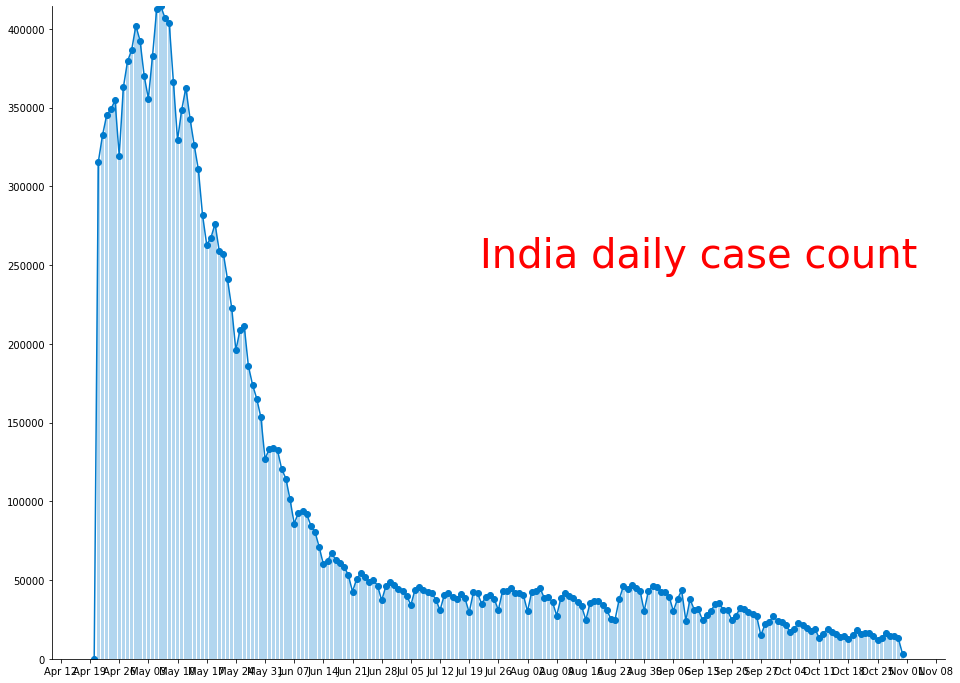

In [22]:
#hide_input
df = dft_ct_new_cases.copy()
df.loc['Total'] = df.sum()
ef = df.loc['Total'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')

fig,ax1 = plt.subplots(figsize = (16,12))

ax1.bar(ef.date,ef.Total,alpha=0.3,color='#007acc')
ax1.plot(ef.date,ef.Total , marker="o", color='#007acc')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.48, 0.6,'India daily case count', transform = ax1.transAxes,fontsize=40,color='#ff0000');
ax1.set_ylim([min(ef.Total),max(ef.Total)])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

In [23]:
#hide_input
create= """
<!-- #######  HTML!! #########-->
<h1 style="color: #ff004c; text-align: center;">Analysis of top-10 States in covid cases</h1>
"""
html = HTML(create)
display(html)

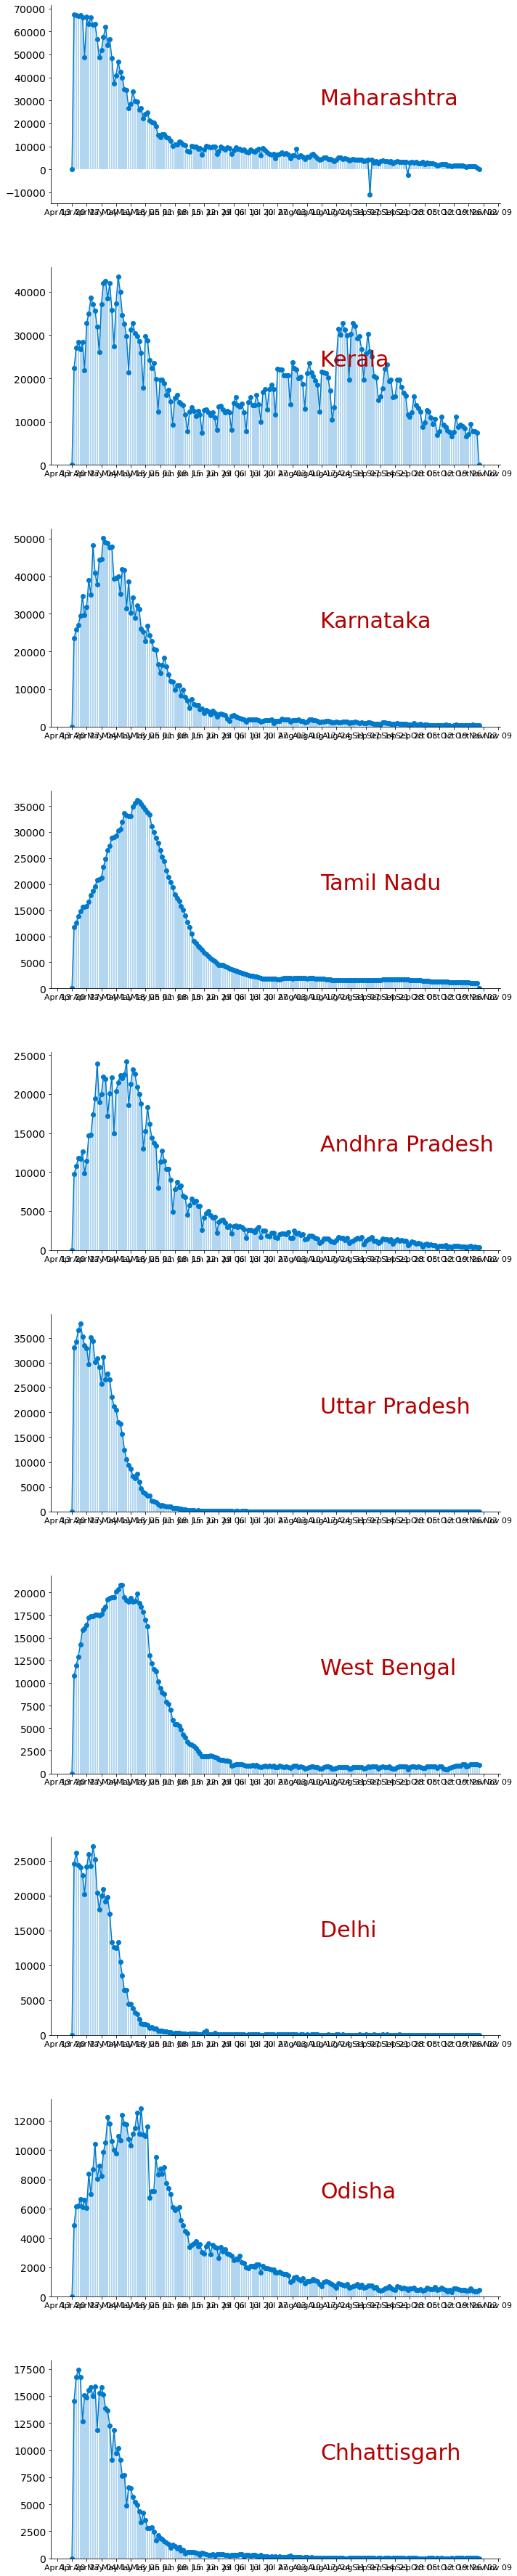

In [24]:
#hide_input
n=10
ax=[]
fig = plt.figure(figsize = (10,50))
gs = fig.add_gridspec(60,20)
arr=df_table.iloc[:10,0].values
count=0
for i in range(len(arr)):
    ax.append(fig.add_subplot(gs[count:count+5,:]))
    ef = df.loc[arr[i]].rename_axis('date').reset_index()
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date.values,ef.iloc[:,-1].values,color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o',color='#007acc')
    ax[i].text(0.6,0.5,f'{arr[i]}',transform = ax[i].transAxes, fontsize = 30,color='#b30000');
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    count+=6
    for tick in ax[i].xaxis.get_major_ticks():
        tick.label1.set_fontsize(11)
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label1.set_fontsize(14)

plt.tight_layout()


In [25]:
#hide_input
fr= df_table['Fatality Rate'].values
ma,mi=max(fr),min(fr)
def max_and_min(df_2,ft):
    for i in range(len(ft)):
        if df_2.iloc[i,-1]==ma:
            state_max=[df_2.iloc[i,0],df_2.iloc[i,-1]]
        elif df_2.iloc[i,-1]==mi:
            state_min=[df_2.iloc[i,0],df_2.iloc[i,-1]]
    return state_max,state_min
        
print(df_table.to_string(index=False))

                                   states    Cases  Deaths   PCases  PDeaths  Cases (+)  Deaths (+)  Fatality Rate
                              Maharashtra  6609906  140196  6609906   140196          0           0           2.12
                                   Kerala  4961490   31514  4961490    31514          0           0           0.64
                                Karnataka  2988333   38082  2988041    38071        292          11           1.27
                               Tamil Nadu  2701614   36097  2701614    36097          0           0           1.34
                           Andhra Pradesh  2066450   14373  2066065    14369        385           4           0.70
                            Uttar Pradesh  1710152   22900  1710152    22900          0           0           1.34
                              West Bengal  1592908   19141  1591994    19126        914          15           1.20
                                    Delhi  1439825   25091  1439825    25091    

In [26]:
#hide_input
a,b=max_and_min(df_table,fr)
fatality=f"""
<!-- #######  HTML!! #########-->
<h1 style="color: #ff004c; text-align: center;">{a[0]} has highest Fatality rate ({a[1]})</h1>
<h1 style="color: #ff004c; text-align: center;">{b[0]} has highest Fatality rate ({b[1]})</h1>"""

html = HTML(fatality)
display(html)